# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
#Carregamento das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedFormatter, FixedLocator

In [3]:
#Carregamento da base de dados
renda_raw = pd.read_csv('M10.csv')
renda_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

Existem 2544 dados faltantes na variável 'tempo_emprego' e a variável 'data_ref' está categorizada como string. 

In [13]:
#Data Wrangling - Structuring
renda_raw['data_ref'] = pd.to_datetime(renda_raw['data_ref'])
renda_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   index                  15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          12466 non-null  float64       
 13  q

In [17]:
#Data Wrangling - Cleaning
renda = renda_raw.dropna()
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12466 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             12466 non-null  int64         
 1   data_ref               12466 non-null  datetime64[ns]
 2   index                  12466 non-null  int64         
 3   sexo                   12466 non-null  object        
 4   posse_de_veiculo       12466 non-null  bool          
 5   posse_de_imovel        12466 non-null  bool          
 6   qtd_filhos             12466 non-null  int64         
 7   tipo_renda             12466 non-null  object        
 8   educacao               12466 non-null  object        
 9   estado_civil           12466 non-null  object        
 10  tipo_residencia        12466 non-null  object        
 11  idade                  12466 non-null  int64         
 12  tempo_emprego          12466 non-null  float64       
 13  qt_pes

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

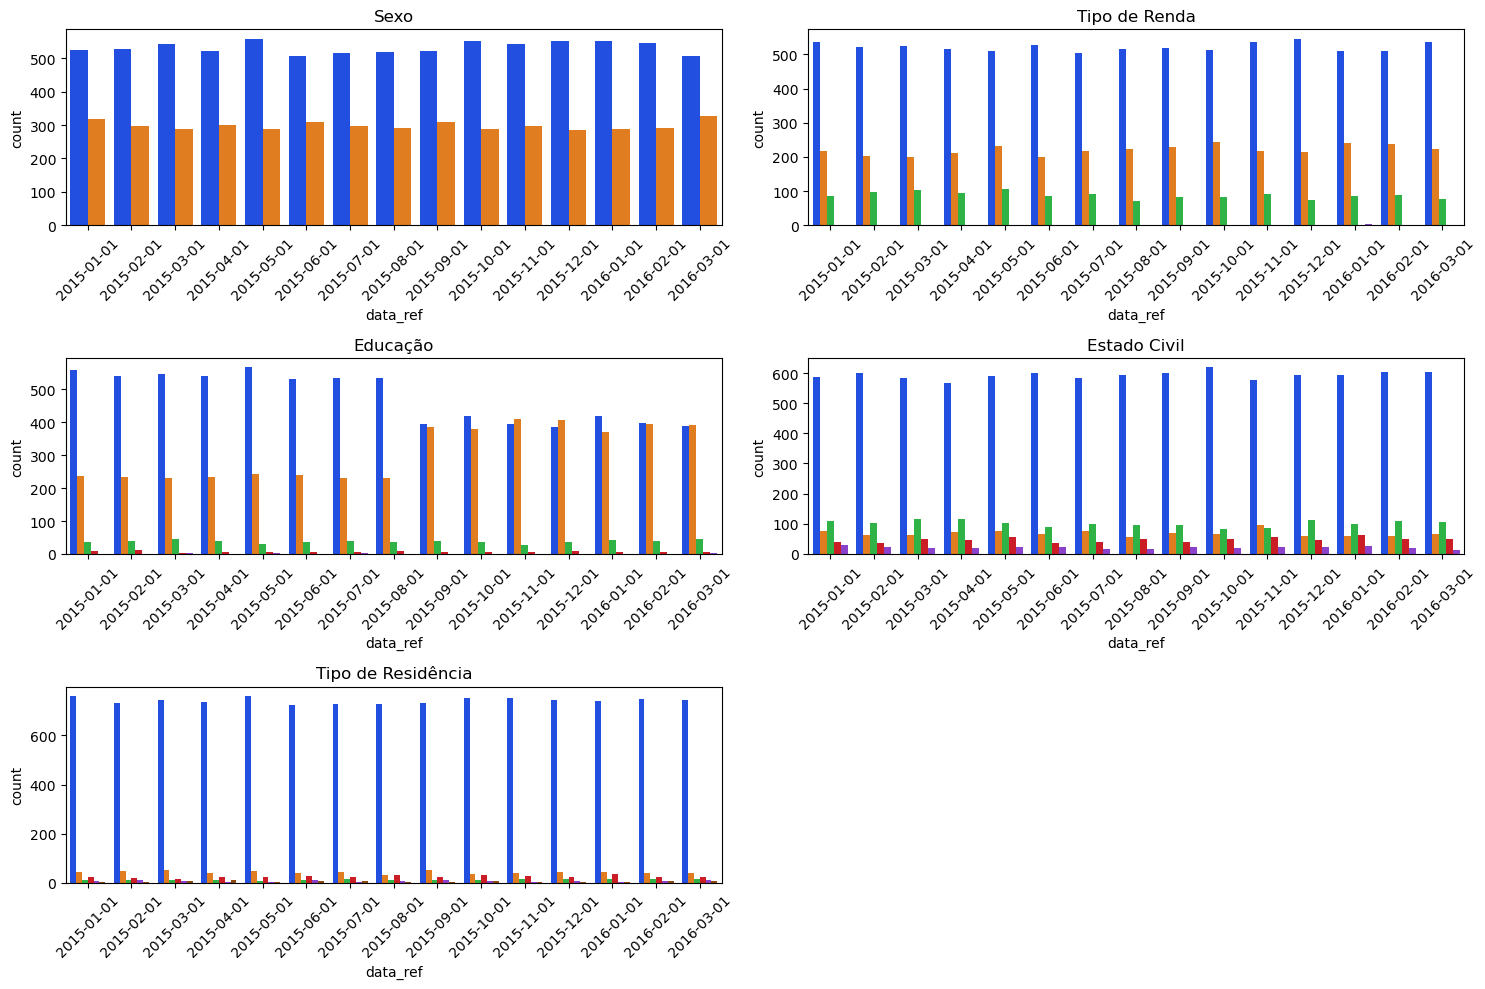

In [69]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

for ax in axes.flat:
    sns.countplot(ax = axes[0,0], x='data_ref', hue='sexo', 
                  data=renda, palette='bright', legend=False).set_title('Sexo')
    sns.countplot(ax = axes[0,1], x='data_ref', hue='tipo_renda', 
                  data=renda, palette='bright', legend=False).set_title('Tipo de Renda')
    sns.countplot(ax = axes[1,0], x='data_ref', hue='educacao', 
                  data=renda, palette='bright', legend=False).set_title('Educação')
    sns.countplot(ax = axes[1,1], x='data_ref', hue='estado_civil', 
                  data=renda, palette='bright', legend=False).set_title('Estado Civil')
    sns.countplot(ax = axes[2,0], x='data_ref', hue='tipo_residencia', 
                  data=renda, palette='bright', legend=False).set_title('Tipo de Residência')

    axes[2, 1].axis('off')

    ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))

    ticks = ax.get_xticks()
    labels = ax.get_xticklabels()

    ax.xaxis.set_major_locator(FixedLocator(ticks))
    ax.xaxis.set_major_formatter(FixedFormatter([label.get_text() for label in labels]))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

A única variável que apresentou uma alteração perceptível foi 'Educação'. Observa-se uma clara diminuição em uma das categorias, acompanhada por um aumento em outra. Seria pertinente conduzir uma análise mais aprofundada do comportamento dessa variável ao longo do tempo para compreender melhor o fenômeno observado.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

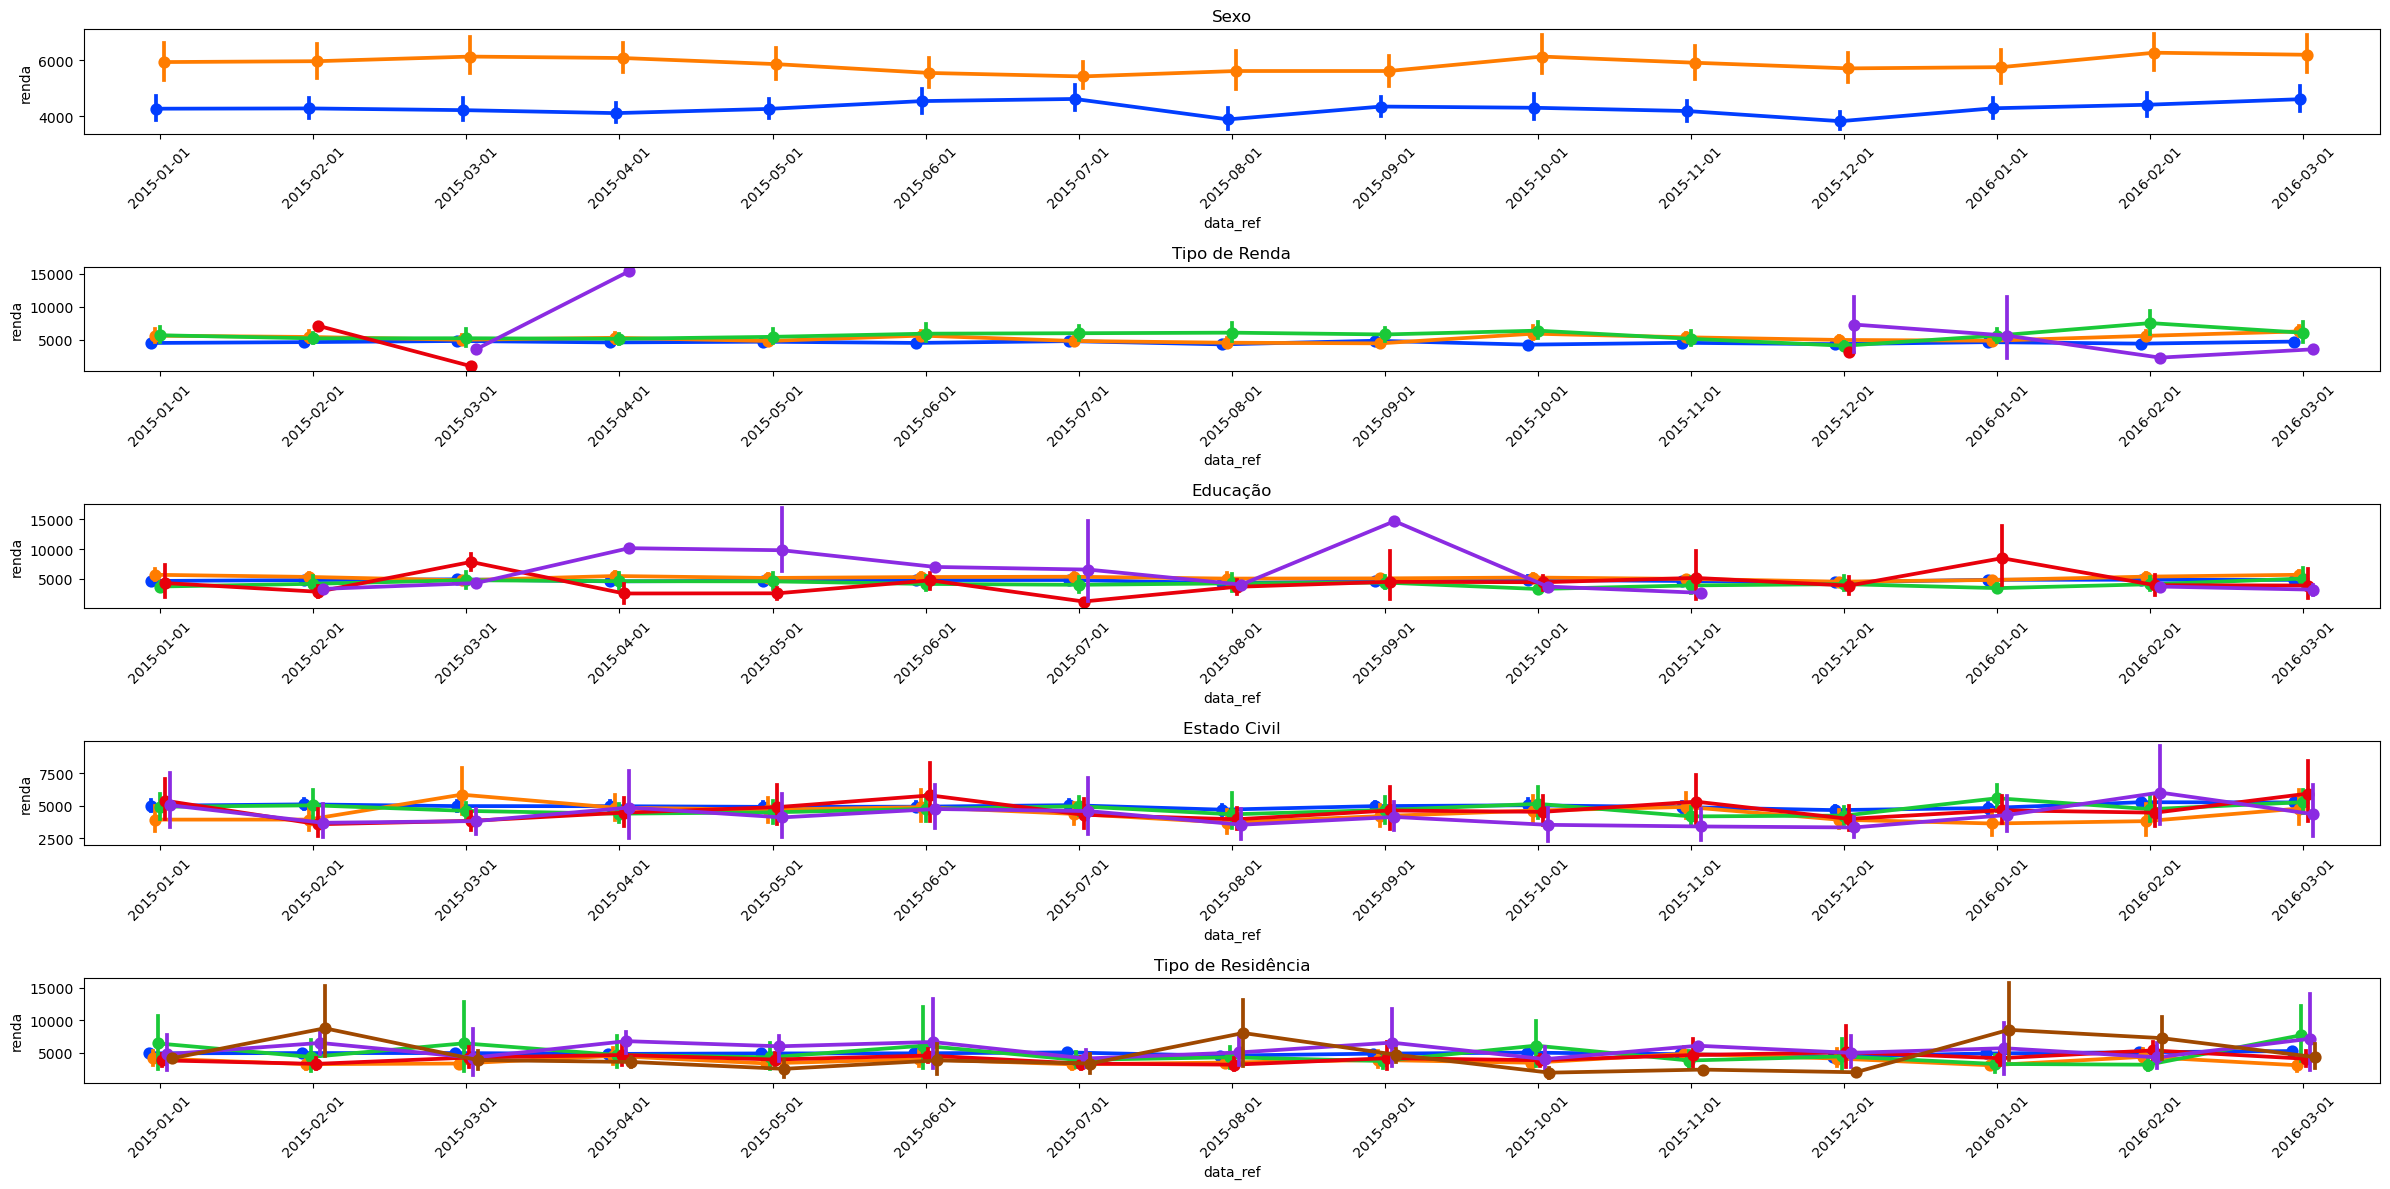

In [156]:
fig, ax = plt.subplots(5, 1, figsize=(24, 12))

sns.pointplot(ax = ax[0], 
              x='data_ref', 
              y='renda', 
              hue='sexo', 
              data=renda, 
              palette='bright', 
              dodge=True, 
              legend=False,
              errorbar=('ci', 95))
ax[0].set_title('Sexo')

sns.pointplot(ax = ax[1], 
              x='data_ref', 
              y='renda', 
              hue='tipo_renda', 
              data=renda, 
              palette='bright', 
              dodge=True, 
              legend=False,
              errorbar=('ci', 95))
ax[1].set_title('Tipo de Renda')

sns.pointplot(ax = ax[2], 
              x='data_ref', 
              y='renda', 
              hue='educacao', 
              data=renda, 
              palette='bright', 
              dodge=True, 
              legend=False,
              errorbar=('ci', 95))
ax[2].set_title('Educação')

sns.pointplot(ax = ax[3], 
              x='data_ref', 
              y='renda', 
              hue='estado_civil', 
              data=renda, 
              palette='bright', 
              dodge=True,
              legend=False,
              errorbar=('ci', 95))
ax[3].set_title('Estado Civil')

sns.pointplot(ax = ax[4], 
              x='data_ref', 
              y='renda', 
              hue='tipo_residencia', 
              data=renda, 
              palette='bright', 
              dodge=True,
              legend=False,
              errorbar=('ci', 95))
ax[4].set_title('Tipo de Residência')


for ax in ax.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

A única variável que, segundo está análise preliminar, apresenta estabilidade e não apresenta sobreposição do intervalo de confiança é a variável 'sexo'. Para utilização destas variáveis com segurança em um modelo preditivo, tècnicas mais avançadas de Engenharia de Feautures precisariam ser aplicadas. 